In [1]:
# Imports
%config InlineBackend.figure_format = 'retina'
%pylab inline
import sys
sys.path.append('../../src/')
from helpers import *
from plothelpers import *
from AdditiveBaseGame import *
from random import sample
import json
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Preprocess 

In [5]:
# Preprocess raw data
for eta in [1, 2, 3]:
    res = load_ABG_simulation('../../results/HUR02/', f'HUR02-eta-{eta}')
    base_counts, num_bases, num_unique_bases, successes, params = res
    params = load_ABG_simulation('../../results/HUR02/', f'HUR02-eta-{eta}', params_only=True)

    df = pd.DataFrame([num_bases.mean(axis=0),
        num_bases.std(axis=0),
        num_unique_bases.mean(axis=0),
        num_unique_bases.std(axis=0),
        successes.mean(axis=0),
        successes.std(axis=0)]
        +base_counts.mean(axis=0).T.tolist()
        +base_counts.std(axis=0).T.tolist()).T

    # columns
    df.columns = pd.MultiIndex.from_tuples([
        ['num_bases', 'mean'], ['num_bases', 'std'],
        ['num_unique_bases', 'mean'], ['num_unique_bases', 'std'],
        ['successes', 'mean'], ['successes', 'std']
    ] + [(f'base-{b}', 'mean') for b in params['bases']]
      + [(f'base-{b}', 'std') for b in params['bases']])

    # Index
    df.index = arange(0, params['T'], params['res'])

    # Reorder
    df = df.reindex_axis(sorted(df.columns), axis=1)
    df.to_csv(f'../../results/HUR02/HUR02-eta-{eta}.csv')

In [21]:
# Extract plotdata: has to be done only once
params = load_ABG_simulation('../../results/HUR02/', f'HUR02-eta-1', params_only=True)
data = []
cols = []
for eta in [1, 2, 3]:
    df = pd.read_csv(f'../../results/HUR02/HUR02-eta-{eta}.csv', index_col=0, header=[0,1])
    data += df[['num_bases', 'num_unique_bases', 'successes']].values.T.tolist()
    cols += [
        [f'eta={eta}', 'num_bases', 'mean'], [f'eta={eta}', 'num_bases', 'std'],
        [f'eta={eta}', 'num_unique_bases', 'mean'], [f'eta={eta}', 'num_unique_bases', 'std'],
        [f'eta={eta}', 'successes', 'mean'], [f'eta={eta}', 'successes', 'std']
    ]
    
df = pd.DataFrame(data).T
df.columns = pd.MultiIndex.from_tuples(cols)
df.index = arange(0, params['T'], params['res'])
df.to_csv('HUR02-plotdata.csv')

# Plot

In [2]:
# Read out plotdata
data = pd.read_csv('HUR02-plotdata.csv', header=[0,1,2], index_col=0)
params = load_ABG_simulation('', 'HUR02-eta-1', params_only=True)

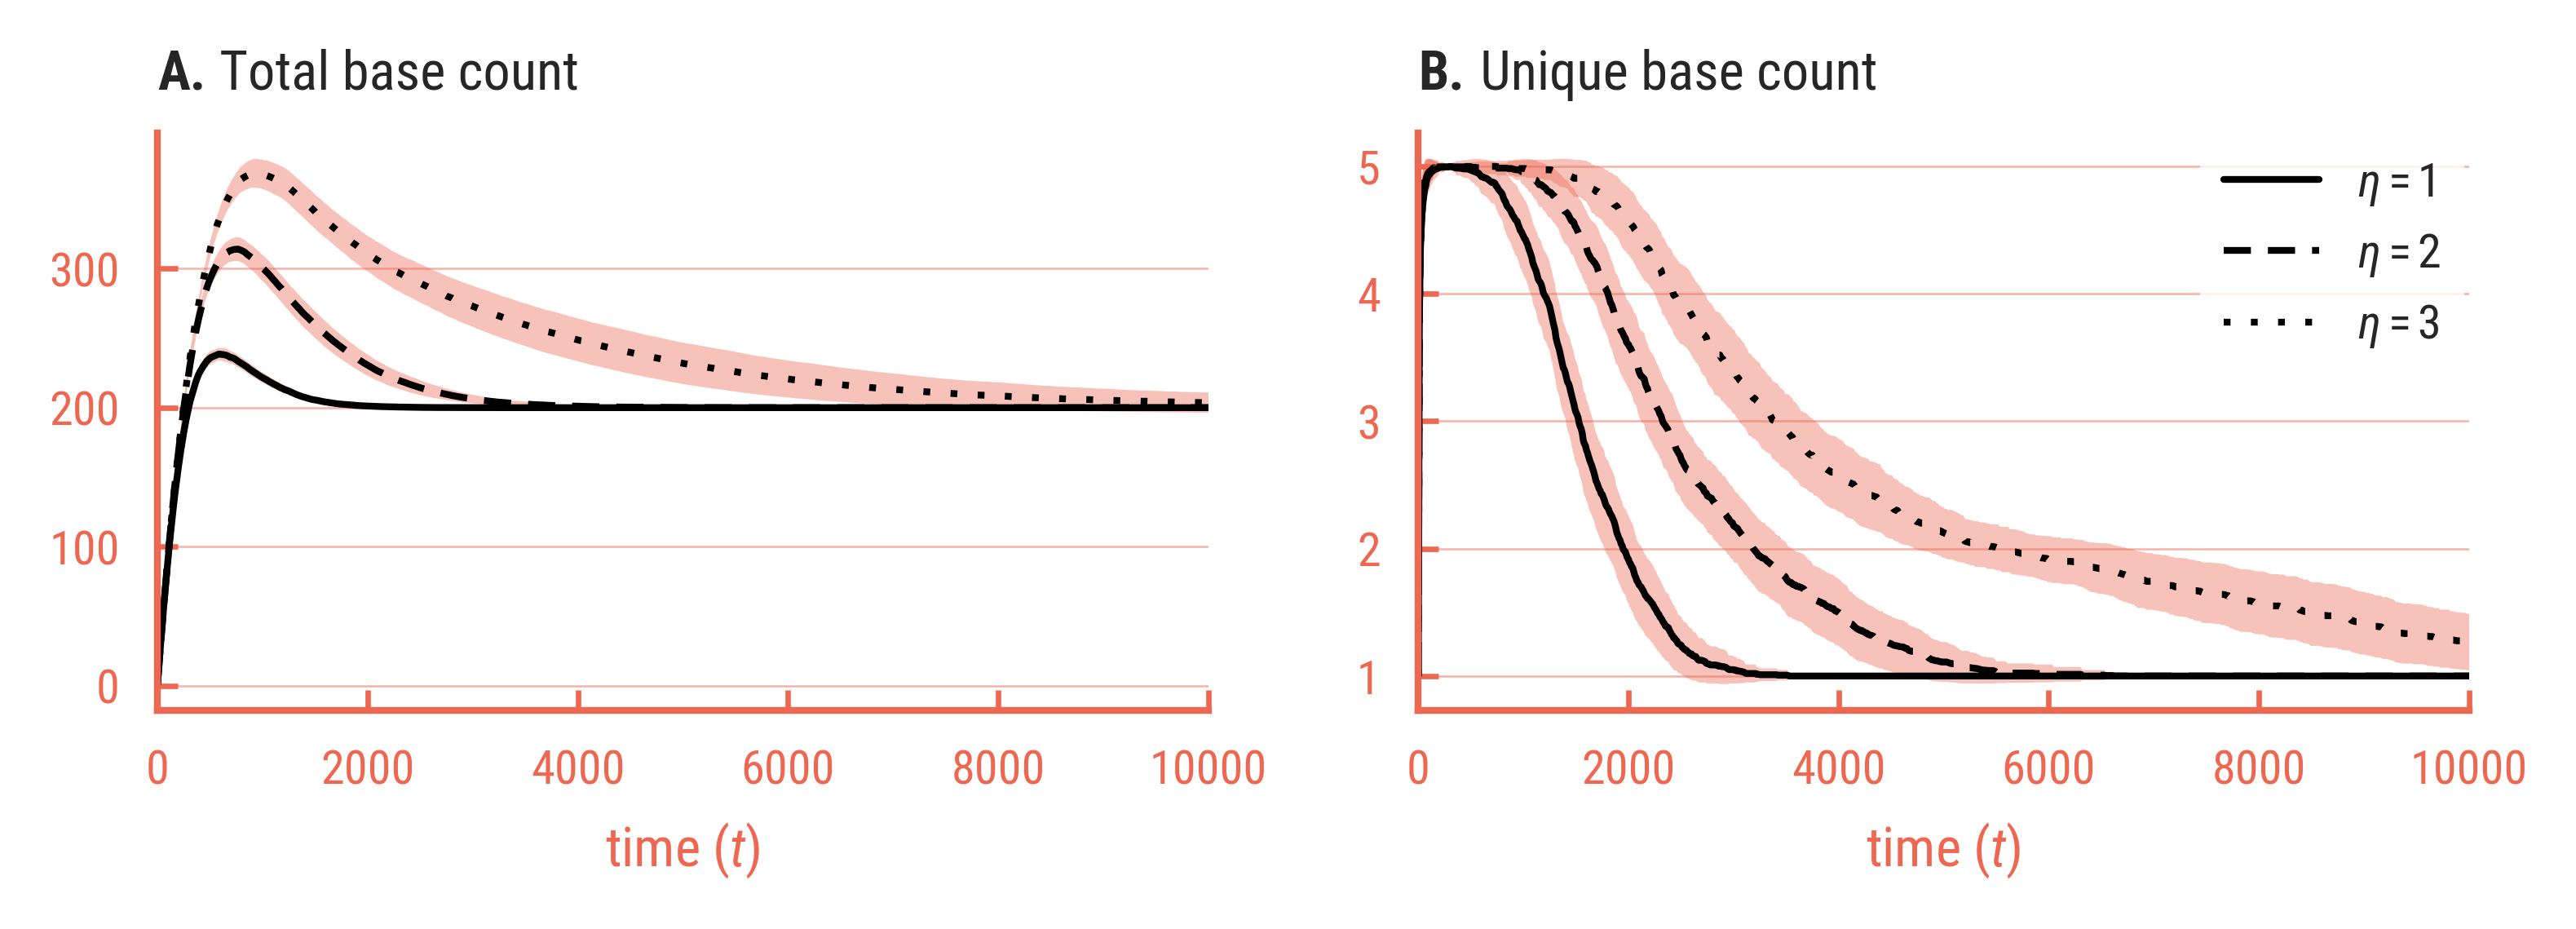

In [4]:
# Plot
figure(figsize=cm2inch(12,3))
dashes = {1: (), 3: (1,3), 2: (4,2.5)}
xs = data.index

ax1 = subplot(121)
for eta in [1,2,3]:
    mean = data[f'eta={eta}']['num_bases']['mean']
    std = data[f'eta={eta}']['num_bases']['std']
    
    plot(xs, mean, dashes=dashes[eta], color='k')
    fill_between(xs, mean+.5*std, mean-.5*std,
                alpha=.4, facecolor=get_color('orange'))
    
title('Total base count')
xlabel('time ($t$)')

ax2 = subplot(122)
for eta in [1,2,3]:
    mean = data[f'eta={eta}']['num_unique_bases']['mean']
    std = data[f'eta={eta}']['num_unique_bases']['std']
    plot(xs, mean, dashes=dashes[eta], color='k', 
         label=f'$\eta={eta}$')
    fill_between(xs, mean+.5*std, mean-.5*std,
                alpha=.4, facecolor=get_color('orange'))
title('Unique base count')
legend()
xlabel('time ($t$)')

# Format axes
restyle_title(ax1, ax2)
for ax in [ax1, ax2]:
    ax.locator_params(nbins=5, axis='y')
    ax.locator_params(nbins=5, axis='x')
    ax.yaxis.grid()
    ax.set_xlim(0, 10000)
sns.despine()

# Remove all margins, so the plots have exactly the right dimensions
subplots_adjust(left=0, bottom=0, right=1, top=1)
savefig('HUR02-results.pdf', bbox_inches='tight')
copyfig('HUR02-results.pdf')